In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 1251

In [4]:
data = [[1, '2019-02-17', '2019-02-28', 5], [1, '2019-03-01', '2019-03-22', 20], [2, '2019-02-01', '2019-02-20', 15], [2, '2019-02-21', '2019-03-31', 30]]
prices = pd.DataFrame(data, columns=['product_id', 'start_date', 'end_date', 'price']).astype({'product_id':'Int64', 'start_date':'datetime64[ns]', 'end_date':'datetime64[ns]', 'price':'Int64'})
data = [[1, '2019-02-25', 100], [1, '2019-03-01', 15], [2, '2019-02-10', 200], [2, '2019-03-22', 30]]
units_sold = pd.DataFrame(data, columns=['product_id', 'purchase_date', 'units']).astype({'product_id':'Int64', 'purchase_date':'datetime64[ns]', 'units':'Int64'})
prices

,product_id,start_date,end_date,price
0,1,2019-02-17,2019-02-28,5
1,1,2019-03-01,2019-03-22,20
2,2,2019-02-01,2019-02-20,15
3,2,2019-02-21,2019-03-31,30


In [ ]:
pd.concat(
prices,
units_sold[['product_id', 'units']], 

)

,product_id,units
0,1,100
1,1,15
2,2,200
3,2,30


In [5]:
units_sold

,product_id,purchase_date,units
0,1,2019-02-25,100
1,1,2019-03-01,15
2,2,2019-02-10,200
3,2,2019-03-22,30


In [ ]:
# units_sold = units_sold.drop([0, 1,2,3], axis='rows')
# units_sold

,product_id,purchase_date,units


In [ ]:
units_sold = units_sold.drop([0,1,2,3], axis='rows')
units_sold

,product_id,purchase_date,units


In [ ]:
df_merge = pd.merge(units_sold, prices, on='product_id', how='right')
df_final = df_merge[
	(df_merge['purchase_date'] >= df_merge['start_date'])
	 & 
	 (df_merge['purchase_date'] <= df_merge['end_date']) 
	]
df_final['total'] = df_final['units'] * df_final['price']

df_group = df_final.groupby('product_id', as_index=False)[['total', 'units']].agg({
	'total' : 'sum',
	'units' : 'sum'
})

df_group['average_price'] = df_group['total'] / df_group['units']
df_final2 = df_group.drop(['total','units'], axis='columns').round(2)
df_final2


,product_id,average_price


In [ ]:
(
	pd.merge(
		prices[['product_id']].drop_duplicates(subset='product_id'), 
		df_final2, 
		how='left', 
		on='product_id')
	.fillna(0)
)

,product_id,average_price
0,1,6.96
1,2,16.96


In [ ]:
df_merged = pd.merge(
	prices, 
	units_sold, 
	on='product_id', 
	how='left')

mask = (df_merged['purchase_date'] >= df_merged['start_date']) & (df_merged['purchase_date'] <= df_merged['end_date'])
df_final = df_merged[mask]
df_final['total']  = df_final['price'] * df_final['units']
df_group = df_final.groupby('product_id', as_index=False)[['units','total']].agg({
	'units' : 'sum',
	'total' : 'sum'
})
df_group['average_price'] = df_group['total'] / df_group['units']
df_final2 = df_group.drop(['units', 'total'], axis='columns').round(2)

pd.merge(
	prices[['product_id']].drop_duplicates(),
	df_final2,
	how='left',
	on='product_id'
	).fillna(0)


,product_id,average_price
0,1,0.0
1,2,0.0


In [1]:
1

1

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path


In [3]:
# plt.style.available
plt.style.use('seaborn-v0_8-whitegrid')

(array([0.00082037, 0.        , 0.00164075, 0.00123056, 0.00369169,
        0.00533244, 0.01394637, 0.02789274, 0.03609649, 0.05373454,
        0.06111791, 0.05250398, 0.05086323, 0.0389678 , 0.0291233 ,
        0.01640749, 0.01025468, 0.00369169, 0.00205094, 0.00082037]),
 array([-2.29595211,  0.14195835,  2.57986882,  5.01777928,  7.45568975,
         9.89360021, 12.33151067, 14.76942114, 17.2073316 , 19.64524207,
        22.08315253, 24.521063  , 26.95897346, 29.39688392, 31.83479439,
        34.27270485, 36.71061532, 39.14852578, 41.58643624, 44.02434671,
        46.46225717]),
 <BarContainer object of 20 artists>)

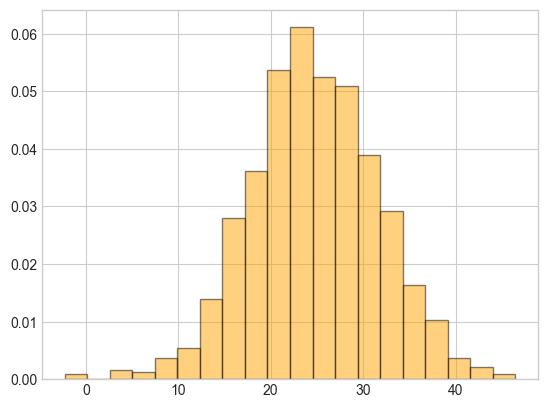

In [36]:
rng = np.random.default_rng(0)
# rng.uniform(0,1,size=5)

# np.random.randint(0,10,size=5)
# rng.integers(0,10,size=5)

x = rng.normal(25,7,size=1000)
plt.hist(
    x,
    bins=20,
    alpha=0.5,
    color='orange',
    edgecolor='black',
    # histtype='stepfilled'
    density=True
    )

In [37]:
df = pd.DataFrame(x)

In [38]:
import plotly.express as px

px.histogram(df)

In [32]:
149/1000 / np.abs(22.08 - 24.52)

np.float64(0.061065573770491766)

In [29]:
fig[1][10], fig[1][11]

(np.float64(22.083152531480952), np.float64(24.521062995667087))

In [24]:
fig[0][10]

np.float64(149.0)

In [22]:
fig[0].argmax()

np.int64(10)

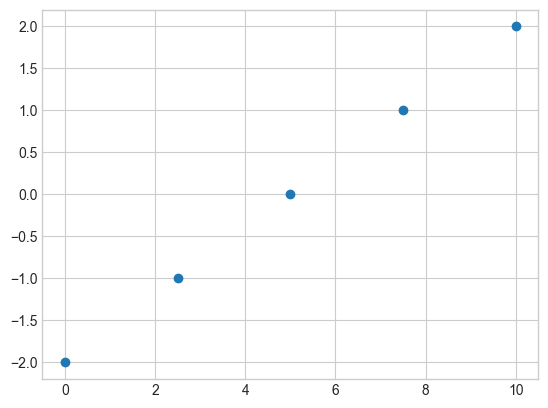

In [14]:
x = np.linspace(0, 10, 5)
y = np.linspace(-2, 2, 5)
plt.scatter(x,y)